# Climate Analysis of Indian Cities using R



In [1]:
library(ggplot2) # Data Viz
library(readr) # To read CSV Files

list.files("../input")
library(ggplot2)
library(dplyr)
library(lubridate)
library(ggbeeswarm)
library(gridExtra)
library(viridis)
ClimateCity <- read.csv("../input/GlobalLandTemperaturesByCity.csv")
ClimateCityIndia <- ClimateCity[ClimateCity$Country=="India",]
ClimateCityIndia$dt <-as.Date(ClimateCityIndia$dt)
ClimateCityIndia$Year <- format(ClimateCityIndia$dt,"%Y")
ClimateCityIndia$Month <- format(ClimateCityIndia$dt,"%m")
# Any results you write to the current directory are saved as output.

[1] "GlobalLandTemperaturesByCity.csv"     
[2] "GlobalLandTemperaturesByCountry.csv"  
[3] "GlobalLandTemperaturesByMajorCity.csv"
[4] "GlobalLandTemperaturesByState.csv"    
[5] "GlobalTemperatures.csv"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: viridisLite



### Average temperature in all 12 months:

Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`


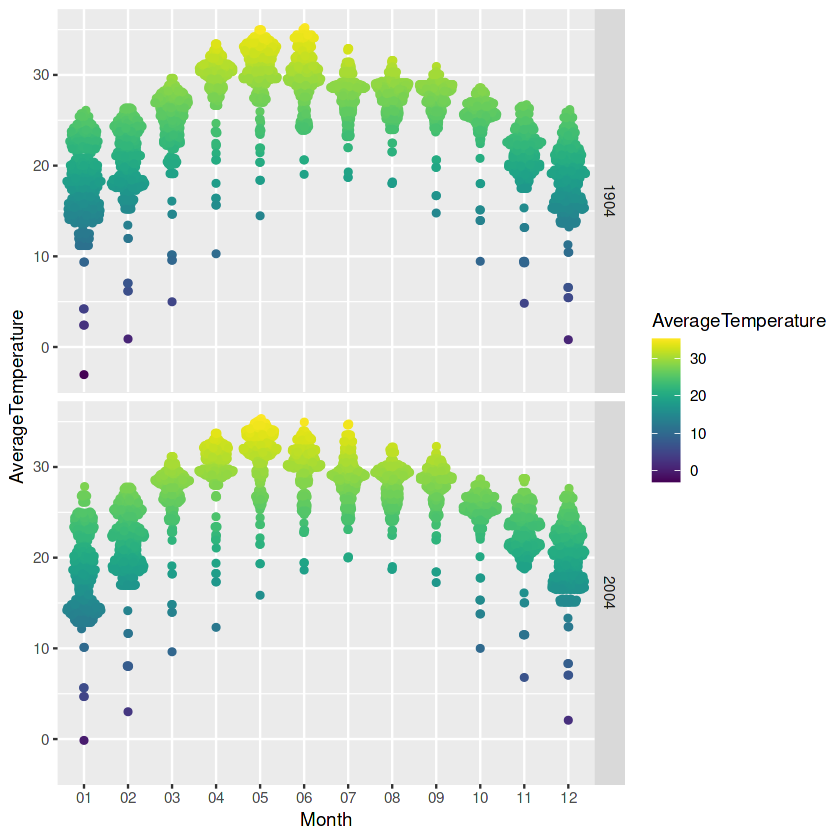

In [8]:
ClimateCityIndia  %>% filter(Year==1904 | Year==2004) %>% ggplot(aes(AverageTemperature,Month,color=AverageTemperature)) + 
geom_quasirandom() + scale_colour_viridis() + facet_grid(Year ~.) + coord_flip()



### Comparing Temperature distributions of different years




Orientation inferred to be along y-axis; override with
`position_quasirandom(orientation = 'x')`
Warning message:
“Removed 6 rows containing missing values (`position_quasirandom()`).”


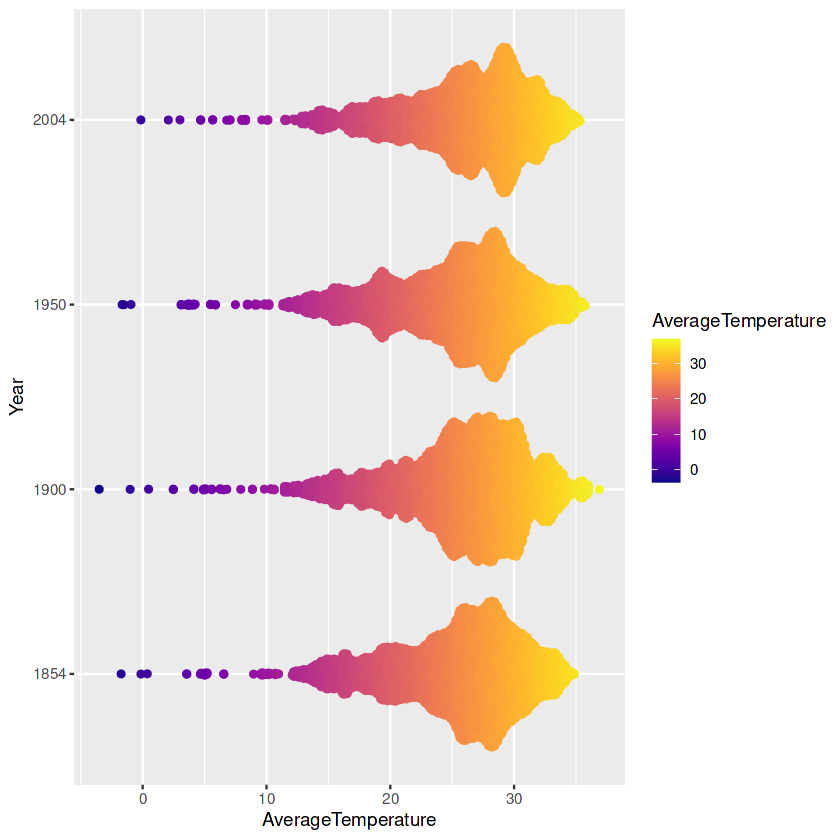

In [3]:
ClimateCityIndia  %>% filter( Year==1854 | Year==1900 | Year==1950 | Year==2004) %>% ggplot(aes(AverageTemperature,Year,color=AverageTemperature)) + 
  geom_quasirandom() + scale_colour_viridis(option = "C")

### Density plot average temperatures of various cities


Warning message:
“Removed 890 rows containing non-finite values (`stat_density()`).”


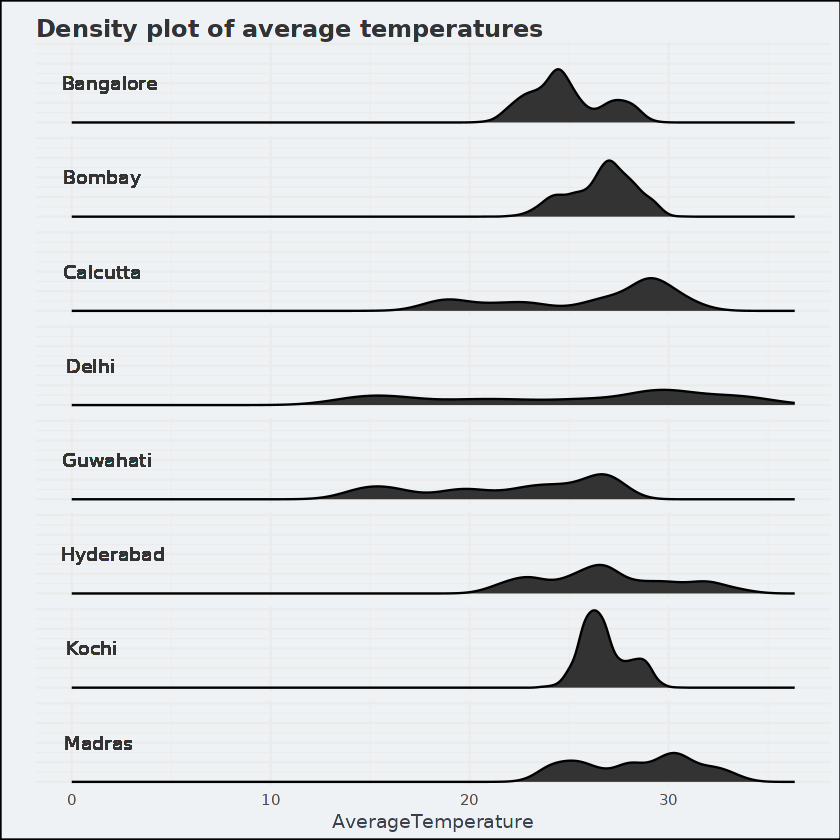

In [4]:
Major_Cities<- c("Madras","Hyderabad", "Bombay", "Bangalore" , "Delhi" ,"Calcutta","Guwahati","Kochi")

df<-ClimateCityIndia %>% filter(City %in% Major_Cities)  


ggplot(df,aes(AverageTemperature,label=paste(City,""))) + geom_density(fill="gray20") +
  facet_grid(City ~.) +
  ylab("")+ 
  geom_text(aes(0,0.2),family="Ubuntu Condensed",fontface="plain",hjust=0.1,color="gray20")+
  theme_minimal()+
  ggtitle("Density plot of average temperatures")+
  theme(text = element_text(family = 'Ubuntu Condensed', face = 'plain', color = '#3A3F4A'),
        axis.text.y = element_blank(),axis.ticks.y = element_blank(),
        axis.line.y = element_blank(),strip.background = element_blank(),
        strip.text.y = element_blank(),axis.line.x = element_blank(),
         plot.background = element_rect(fill = "#EFF2F4"),
        plot.title = element_text(size = 14, face = "bold", colour = "gray20", vjust = -1))



### Temperature Change over the last two centuries

`summarise()` has grouped output by 'City'. You can override using the
`.groups` argument.
Warning message:
“Removed 162 rows containing missing values (`geom_point()`).”


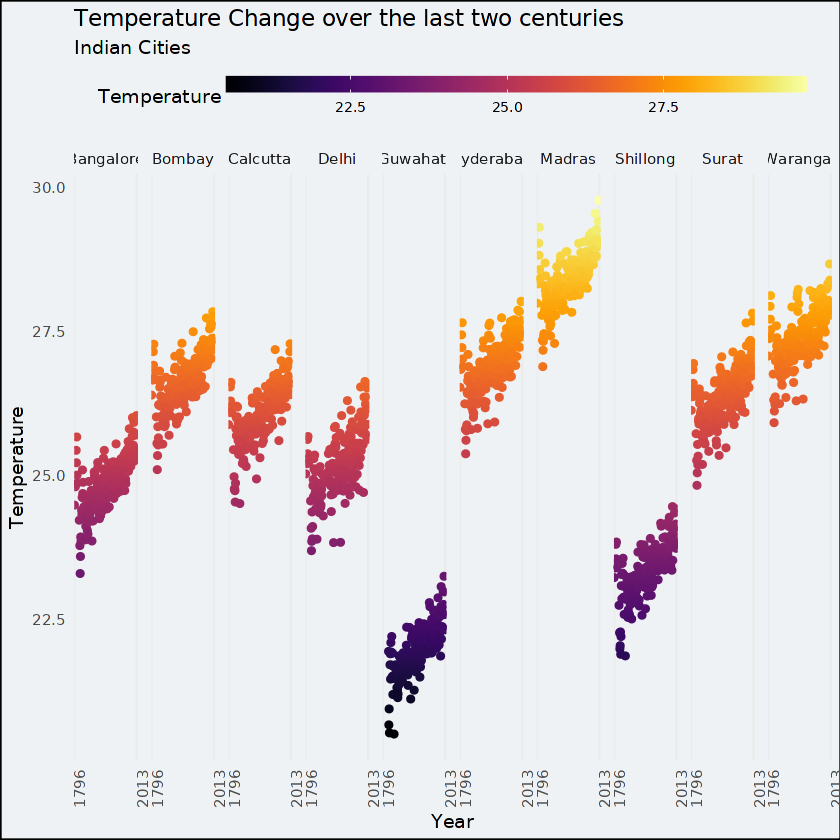

In [5]:
Major_Cities<- c("Madras","Hyderabad", "Bombay", "Bangalore" , "Delhi" ,"Calcutta","Guwahati","Shillong","Surat","Warangal")

  

  ClimateCityIndia %>% filter(City %in% Major_Cities) %>% group_by(City,Year) %>% summarise(avg_temp= mean(AverageTemperature)) %>% ggplot(aes(Year,avg_temp,color=avg_temp)) + 
    geom_point() +
  scale_x_discrete( breaks = c(1796,2013))+ theme_minimal(base_family = "Ubuntu Condensed")+ scale_color_viridis(option="B")+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),
        panel.spacing = unit(0.6, "lines"),legend.position = "top",
        legend.text=element_text(size=8),
        panel.grid.major.y = element_blank(),panel.grid.minor.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.ticks.x = element_blank(),
        plot.background = element_rect(fill = "#EFF2F4"),
        legend.key.height = unit(10, "pt"),
        legend.key.width = unit(70, "pt"))+
        ggtitle("Temperature Change over the last two centuries",subtitle = "Indian Cities")+
         ylab("Temperature")+labs(color="Temperature")+
facet_grid(~City )

### Heatmap by Cities Monthwise:

`summarise()` has grouped output by 'City'. You can override using the
`.groups` argument.


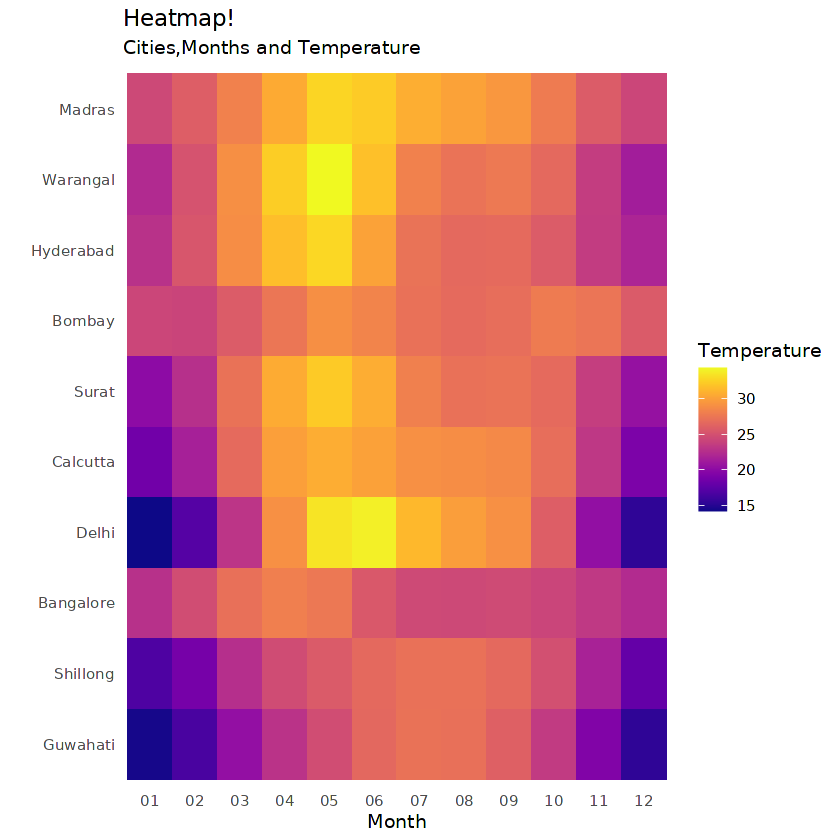

In [6]:
ClimateCityIndia %>% filter(City %in% Major_Cities) %>% group_by(City,Month) %>% 
    summarise(avg_temp= mean(AverageTemperature,na.rm=T)) %>% ggplot(aes(Month,reorder(City,avg_temp),fill=avg_temp)) +geom_tile()+
    scale_fill_viridis(option = "C") + theme_minimal(base_family = "Ubuntu Condensed")+ labs(fill= "Temperature ")+ ylab("")+
    theme(panel.grid= element_blank()) + ggtitle("Heatmap!",subtitle = "Cities,Months and Temperature")

### Average Temperature in India from start to end monthwise:

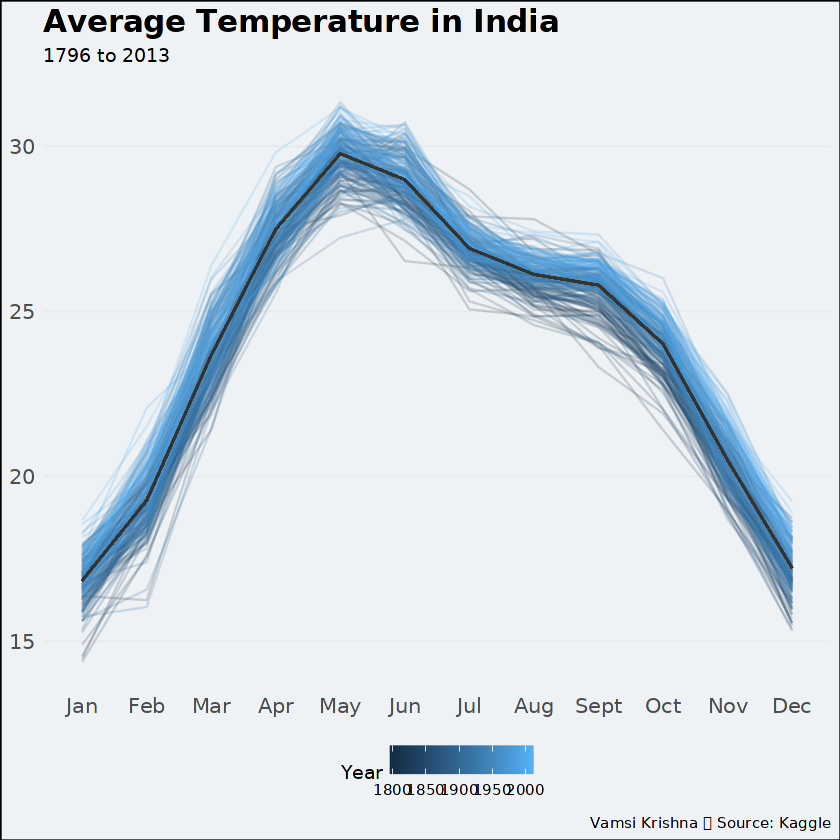

In [7]:
ClimateCountry <- read.csv("../input/GlobalLandTemperaturesByCountry.csv")

India <- ClimateCountry %>% filter(Country=="India")

India$dt <-as.Date(India$dt)
India$Year <- format(India$dt,"%Y")
India$Month <- format(India$dt,"%m")

India %>% filter(!is.na(AverageTemperature))  %>% 
  group_by(Year) %>% mutate(no_of_cases= length(Year)) %>% group_by(Month) %>% mutate(avg_tempMonth= mean(AverageTemperature)) %>%
  filter(no_of_cases==12) %>% 
  ggplot(aes(Month,AverageTemperature,group=Year,color =as.numeric(Year))) + geom_line(alpha= 0.2) + 
  geom_line(aes(Month,avg_tempMonth),color= "grey20",alpha = 0.4) +
  theme_minimal(base_family = "Ubuntu Condensed")+
  scale_x_discrete(labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"))+labs(color="Year") +
  theme(legend.position = "bottom",axis.title = element_blank(),
        panel.grid.major.x = element_blank(),
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank(),
        plot.background = element_rect(fill = "#EFF2F4"),
        axis.text = element_text(size = 12),
        plot.title = element_text(size=18,face = "bold")) + 
  ggtitle("Average Temperature in India",subtitle = "1796 to 2013 ") + labs(caption= "Vamsi Krishna \t Source: Kaggle") 


